## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

#### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [2]:
#flights_sample = pd.read_csv("../../data/raw/200K_random_flights(26Nov).csv", index_col=None)
# Importing Enriched data instead
flights_sample = pd.read_csv("../../data/raw/Enriched-flights_sample.csv", index_col=None)

C:\Users\987\AppData\Local\Temp\ipykernel_40092\821657024.py:3: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_sample = pd.read_csv("../../data/raw/Enriched-flights_sample.csv", index_col=None)


In [3]:
delayed_flights = flights_sample[flights_sample['Arrival Delay (minutes)'] > 0]
delayed_flights.shape

(61680, 64)

In [4]:
flights_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190117 entries, 0 to 190116
Data columns (total 64 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  190117 non-null  int64  
 1   Marketer - Unique Carrier Code              190117 non-null  object 
 2   Operator - Unique Carrier Code              190117 non-null  object 
 3   Different Marketer & Operator Carrier Code  190117 non-null  int64  
 4   Tail Number                                 189993 non-null  object 
 5   Flight Number                               190117 non-null  int64  
 6   Flight Year                                 190117 non-null  int64  
 7   Flight Month                                190117 non-null  int64  
 8   Flight Day                                  190117 non-null  int64  
 9   Flight Weekday                              190117 non-null  int64  
 

In [5]:
#Notes:
#all cancelled flights have zeroes in all delay columns
#all early flights (negative value in 'Arrival Delay (minutes) have zeroes in all other delay columns. ')


#Cancelled Flights - look at only flights with canvelled == 1
cancelled_flights = flights_sample[flights_sample['cancelled'] == 1]
cancelled_flights = cancelled_flights[['cancelled','Arrival Delay (minutes)','Carrier Delay (minutes)','Weather Delay (minutes)','National Air System Delay (minutes)','Security Delay (minutes)','Late Aircraft Delay (minutes)']]
cancelled_flights.head()

,cancelled,Arrival Delay (minutes),Carrier Delay (minutes),Weather Delay (minutes),National Air System Delay (minutes),Security Delay (minutes),Late Aircraft Delay (minutes)
150143,1,NaN,NaN,NaN,NaN,NaN,NaN
150155,1,NaN,NaN,NaN,NaN,NaN,NaN
150206,1,NaN,NaN,NaN,NaN,NaN,NaN
150251,1,NaN,NaN,NaN,NaN,NaN,NaN
150257,1,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cancelled_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 150143 to 190100
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   cancelled                            668 non-null    int64  
 1   Arrival Delay (minutes)              0 non-null      float64
 2   Carrier Delay (minutes)              0 non-null      float64
 3   Weather Delay (minutes)              0 non-null      float64
 4   National Air System Delay (minutes)  0 non-null      float64
 5   Security Delay (minutes)             0 non-null      float64
 6   Late Aircraft Delay (minutes)        0 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 41.8 KB


In [7]:
#Early Flights - look at only flights with arrival delay > 0
early_flights = flights_sample[flights_sample['Arrival Delay (minutes)'] < 0]
early_flights = early_flights[['Arrival Delay (minutes)','Carrier Delay (minutes)','Weather Delay (minutes)','National Air System Delay (minutes)','Security Delay (minutes)','Late Aircraft Delay (minutes)']]
early_flights.head()

,Arrival Delay (minutes),Carrier Delay (minutes),Weather Delay (minutes),National Air System Delay (minutes),Security Delay (minutes),Late Aircraft Delay (minutes)
0,-1.0,NaN,NaN,NaN,NaN,NaN
1,-7.0,NaN,NaN,NaN,NaN,NaN
5,-11.0,NaN,NaN,NaN,NaN,NaN
6,-14.0,NaN,NaN,NaN,NaN,NaN
8,-7.0,NaN,NaN,NaN,NaN,NaN


In [8]:
early_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124036 entries, 0 to 190115
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Arrival Delay (minutes)              124036 non-null  float64
 1   Carrier Delay (minutes)              0 non-null       float64
 2   Weather Delay (minutes)              0 non-null       float64
 3   National Air System Delay (minutes)  0 non-null       float64
 4   Security Delay (minutes)             0 non-null       float64
 5   Late Aircraft Delay (minutes)        0 non-null       float64
dtypes: float64(6)
memory usage: 6.6 MB


In [9]:
#Late Flights - look at only flights with arrival delay > 0
late_flights = flights_sample[flights_sample['Arrival Delay (minutes)'] > 0]
late_flights = late_flights[['Departure Delay (minutes)','Arrival Delay (minutes)','Carrier Delay (minutes)','Weather Delay (minutes)','National Air System Delay (minutes)','Security Delay (minutes)','Late Aircraft Delay (minutes)']]
late_flights.head(5)

,Departure Delay (minutes),Arrival Delay (minutes),Carrier Delay (minutes),Weather Delay (minutes),National Air System Delay (minutes),Security Delay (minutes),Late Aircraft Delay (minutes)
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,5.0,8.0,NaN,NaN,NaN,NaN,NaN
4,11.0,11.0,NaN,NaN,NaN,NaN,NaN
9,12.0,12.0,NaN,NaN,NaN,NaN,NaN
12,6.0,7.0,NaN,NaN,NaN,NaN,NaN


In [10]:
late_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61680 entries, 2 to 190116
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Departure Delay (minutes)            61679 non-null  float64
 1   Arrival Delay (minutes)              61680 non-null  float64
 2   Carrier Delay (minutes)              30821 non-null  float64
 3   Weather Delay (minutes)              30821 non-null  float64
 4   National Air System Delay (minutes)  30821 non-null  float64
 5   Security Delay (minutes)             30821 non-null  float64
 6   Late Aircraft Delay (minutes)        30821 non-null  float64
dtypes: float64(7)
memory usage: 3.8 MB


In [11]:
# Explore diverted flights column
flights_sample['diverted'].value_counts()

0    190025
1        92
Name: diverted, dtype: int64

In [12]:
flights_sample = flights_sample[flights_sample['cancelled'] == 0]
flights_sample = flights_sample[flights_sample['diverted'] == 0]
print("Cancelled:\n", flights_sample['cancelled'].value_counts())
print("\nDiverted:\n", flights_sample['diverted'].value_counts())
print("\nrows in flights_sample after removing cancelled and diverted columns: ", flights_sample.shape[0])

Cancelled:
 0    189357
Name: cancelled, dtype: int64

Diverted:
 0    189357
Name: diverted, dtype: int64

rows in flights_sample after removing cancelled and diverted columns:  189357


In [13]:
flights_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189357 entries, 0 to 190116
Data columns (total 64 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  189357 non-null  int64  
 1   Marketer - Unique Carrier Code              189357 non-null  object 
 2   Operator - Unique Carrier Code              189357 non-null  object 
 3   Different Marketer & Operator Carrier Code  189357 non-null  int64  
 4   Tail Number                                 189357 non-null  object 
 5   Flight Number                               189357 non-null  int64  
 6   Flight Year                                 189357 non-null  int64  
 7   Flight Month                                189357 non-null  int64  
 8   Flight Day                                  189357 non-null  int64  
 9   Flight Weekday                              189357 non-null  int64  
 

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [14]:
flights_sample.shape

(189357, 64)

Let's see the Arrival Delays in a boxplot:

<AxesSubplot: >

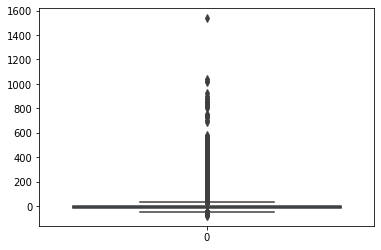

In [15]:
sns.boxplot(flights_sample['Arrival Delay (minutes)'])

Create histogram to visually gauge whether distribution may be normal

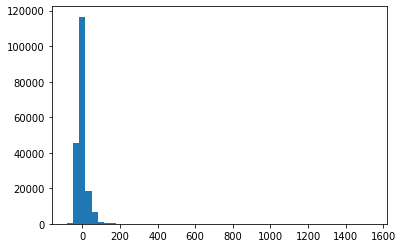

In [16]:
fig, ax = plt.subplots()
ax.hist(flights_sample['Arrival Delay (minutes)'], bins=50)
plt.show()

Clearly outliers exist. 

In [17]:
#Remove values which are greater than 3 standard deviations from the mean
mean = flights_sample['Arrival Delay (minutes)'].mean()
std = flights_sample['Arrival Delay (minutes)'].std()
cut_off = std * 3
print(mean)
print(std)
print(cut_off)

-0.6713229469236863
28.576229629517293
85.72868888855189


In [18]:
#Create upper and lower bounds for cut-off (less than and greater than 3 standard deviations from the mean)
lower_bound = mean - cut_off
upper_bound = mean + cut_off
print(lower_bound)
print(upper_bound)

-86.40001183547557
85.0573659416282


In [19]:
flights_sample_no_outliers = flights_sample[(flights_sample['Arrival Delay (minutes)'] < upper_bound) & (flights_sample['Arrival Delay (minutes)'] > lower_bound)]
arr_delays_no_outliers = flights_sample_no_outliers['Arrival Delay (minutes)']
arr_delays_no_outliers.describe()

count    187595.000000
mean         -2.205443
std          21.027101
min         -80.000000
25%         -15.000000
50%          -7.000000
75%           5.000000
max          85.000000
Name: Arrival Delay (minutes), dtype: float64

In [20]:
#Check the % of data that was removed by removing outliers
(flights_sample.shape[0] - flights_sample_no_outliers.shape[0]) / flights_sample.shape[0] * 100

0.930517488130885

In [21]:
#Removed < 2% of the data - ok. 

#Remove all cancelled flights from the dataset - these provide misleading information about lateness. 
flights_sample_no_outliers_no_cancelled = flights_sample_no_outliers[flights_sample_no_outliers['cancelled'] == 0]
flights_sample_no_outliers_no_cancelled.head()

#Remove all diverted flights from the dataset - these provide misleading information about lateness. 
flights_sample_no_outliers_no_cancelled_no_diverted = flights_sample_no_outliers_no_cancelled[flights_sample_no_outliers_no_cancelled['cancelled'] == 0]
flights_sample_no_outliers_no_cancelled_no_diverted.head()

,Unnamed: 0,Marketer - Unique Carrier Code,Operator - Unique Carrier Code,Different Marketer & Operator Carrier Code,Tail Number,Flight Number,Flight Year,Flight Month,Flight Day,Flight Weekday,Aircraft group,Aircraft type,Aircraft configuration,Service class,Proportion of freight to the payload,Proportion of mail to the payload,Proportion of filled seats,Average payload (lbs),Average number of available seats,Distance interval (x500mi),Distance (miles),Scheduled Elapsed Time,Origin Airport (IATA Code),Airport Type_origin,Flights Count_origin,Average Flights Per Day_origin,Busyness Score_origin,Scheduled Departure Time (local time),Scheduled hour of departure,Precipitation (mm)_origin,Snowfall (mm)_origin,Maximum Temperature (*C)_origin,Avg Pressure for the day (hPa)_origin,Avg Wind Speed (m/s)_origin,Avg Humidity (%)_origin,Fog_origin,Thunder_origin,Smoke_or_Haze_origin,Destination Airport (IATA Code),Airport Type_destination,Flights Count_destination,Average Flights Per Day_destination,Busyness Score_destination,Scheduled Arrival Time (local time),Scheduled hour of arrival,Precipitation (mm)_destination,Snowfall (mm)_destination,Maximum Temperature (*C)_destination,Avg Pressure for the day (hPa)_destination,Avg Wind Speed (m/s)_destination,Avg Humidity (%)_destination,Fog_destination,Thunder_destination,Smoke_or_Haze_destination,Departure Delay (minutes),Arrival Delay (minutes),Carrier Delay (minutes),Weather Delay (minutes),National Air System Delay (minutes),Security Delay (minutes),Late Aircraft Delay (minutes),cancelled,cancellation_code,diverted
0,0,DL,9E,1,N909XJ,5011,2019,2,7,3,6.0,638.0,1.0,F,0.000000,0.000000,0.676929,13250.166667,52.157391,1.0,395,111,BOS,large_airport,839,826.720105,1.014854,11:38,11,15.7,0.0,7.2,1020.0,4.3,96.0,1.0,0.0,1.0,BUF,large_airport,153,159.152431,0.961343,14:49,14,23.1,0.0,15.6,987.5,3.9,100.0,1.0,0.0,0.0,20.0,-1.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,1,AA,YX,1,N120HQ,4416,2019,12,28,5,6.0,673.0,1.0,F,0.000000,0.000000,0.702544,21803.000000,76.000000,2.0,605,134,HVN,medium_airport,6,5.662286,1.059643,18:56,18,0.5,0.0,10.6,NaN,1.4,NaN,0.0,0.0,0.0,CLT,large_airport,1406,1375.864652,1.021903,22:30,22,0.0,0.0,20.6,995.3,1.6,93.0,1.0,0.0,1.0,-8.0,-7.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,2,DL,DL,0,N966DL,2216,2019,3,1,4,6.0,655.0,1.0,F,0.001528,0.000000,0.871640,35472.119048,145.815321,1.0,259,81,CHS,medium_airport,134,144.137976,0.929665,01:46,1,6.9,0.0,22.2,1015.9,3.4,100.0,2.0,0.0,0.0,ATL,large_airport,2191,2149.977661,1.019080,04:27,4,12.4,0.0,20.6,979.0,3.9,93.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,3,UA,UA,0,N823UA,2254,2018,10,4,3,6.0,694.0,1.0,F,0.016265,0.006401,0.735561,43192.489137,163.859945,1.0,224,59,RDU,large_airport,405,374.352168,1.081869,16:55,16,0.0,0.0,31.7,1002.0,1.2,100.0,1.0,0.0,0.0,IAD,large_airport,563,507.784494,1.108738,18:34,18,0.0,0.0,31.7,1004.4,1.6,100.0,2.0,0.0,0.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,AA,OH,1,N534AE,5218,2019,4,26,4,6.0,631.0,1.0,F,0.000660,0.000000,0.784746,17076.666667,64.167463,1.0,91,65,AVL,medium_airport,56,51.358739,1.090369,06:00,6,4.3,0.0,23.3,931.3,6.6,87.0,1.0,0.0,0.0,CLT,large_airport,1458,1375.864652,1.059697,07:45,7,1.8,0.0,23.3,978.7,4.8,78.0,0.0,1.0,0.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [22]:
#Check total % of data removed by removing outliers, canelled, diverted
(flights_sample.shape[0] - flights_sample_no_outliers_no_cancelled_no_diverted.shape[0]) / flights_sample.shape[0] * 100

0.930517488130885

In [23]:
# less than 1% - ok. Use this sample for calculations. 
flights_analysis = flights_sample_no_outliers_no_cancelled_no_diverted

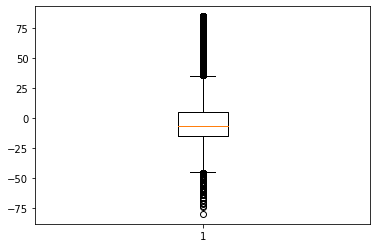

In [24]:
#Create box plot with no outliers
fig, ax = plt.subplots()
ax.boxplot(flights_analysis['Arrival Delay (minutes)'])
plt.show()

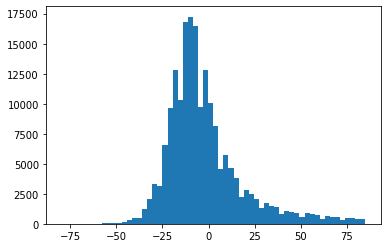

In [25]:
#Check histogram with no outliers
fig, ax = plt.subplots()
ax.hist(flights_analysis['Arrival Delay (minutes)'], bins = 60)
plt.show()

In [26]:
#perform Kolmogorov-Smirnov test (cannot use Shaprio-Wilks because > 5000 points)

from scipy.stats import kstest

kstest(flights_analysis['Arrival Delay (minutes)'], 'norm')

KstestResult(statistic=0.6166912177679647, pvalue=0.0)

In [27]:
# p-value < 0.05 meaning it is NOT normally distributed

#Take sample of 5000 values to try Shapiro-Wilks test. 
delays_5000 = flights_analysis['Arrival Delay (minutes)'].sample(n=5000)

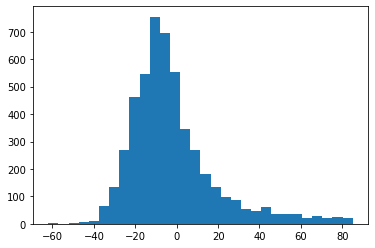

In [28]:
#Check histogram with no outliers
fig, ax = plt.subplots()
ax.hist(delays_5000, bins = 30)
plt.show()

In [29]:
#Perform Shapiro-Wilks test to see if normal
#Import Shapiro-Wilks test from Shapiro

from scipy.stats import shapiro
sh_test = delays_5000
stat, p = shapiro(sh_test)
if p > 0.05:
    print("The distribution is Gaussian")
else:
    print("The distribution is not Gaussian")

The distribution is not Gaussian


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

C:\Users\987\anaconda3\envs\main_ide\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\987\anaconda3\envs\main_ide\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\987\anaconda3\envs\main_ide\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\987\anaconda3\envs\main_ide\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\987\anaconda3\envs\main_ide\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\987\anaconda3\envs\main_ide\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\987\anaconda3\envs\

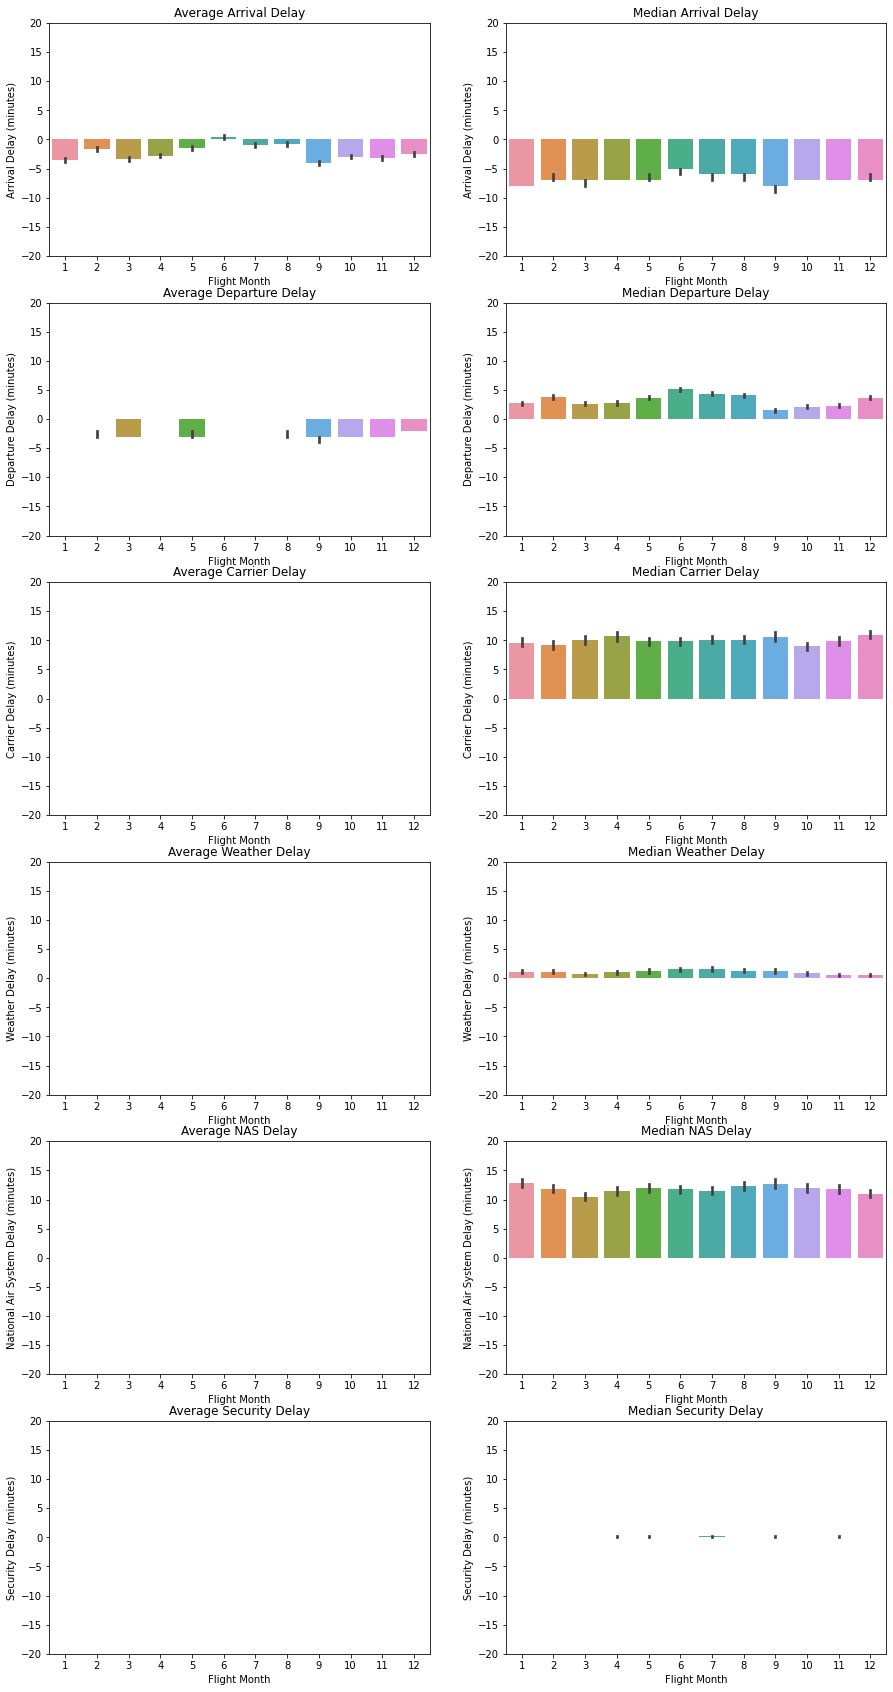

In [30]:
#Make a 6x2 grid of plots, with on each row the average and median delay for each month of arrival delay, departure delay, carrier delay, weather delay, NAS delay, and security delay
fig, ax = plt.subplots(6, 2, figsize=(15, 30))
#fig.suptitle('Average (Left) & Median (Right) Monthly Delay for Arrival and Departure', fontsize=16, fontweight='bold')
sns.barplot(x='Flight Month', y='Arrival Delay (minutes)', data=flights_analysis, ax=ax[0,0])
sns.barplot(x='Flight Month', y='Arrival Delay (minutes)', data=flights_analysis, ax=ax[0,1], estimator=np.median)
sns.barplot(x='Flight Month', y='Departure Delay (minutes)', data=flights_analysis, ax=ax[1,1])
sns.barplot(x='Flight Month', y='Departure Delay (minutes)', data=flights_analysis, ax=ax[1,0], estimator=np.median)
sns.barplot(x='Flight Month', y='Carrier Delay (minutes)', data=flights_analysis, ax=ax[2,1])
sns.barplot(x='Flight Month', y='Carrier Delay (minutes)', data=flights_analysis, ax=ax[2,0], estimator=np.median)
sns.barplot(x='Flight Month', y='Weather Delay (minutes)', data=flights_analysis, ax=ax[3,1])
sns.barplot(x='Flight Month', y='Weather Delay (minutes)', data=flights_analysis, ax=ax[3,0], estimator=np.median)
sns.barplot(x='Flight Month', y='National Air System Delay (minutes)', data=flights_analysis, ax=ax[4,1])
sns.barplot(x='Flight Month', y='National Air System Delay (minutes)', data=flights_analysis, ax=ax[4,0], estimator=np.median)
sns.barplot(x='Flight Month', y='Security Delay (minutes)', data=flights_analysis, ax=ax[5,1])
sns.barplot(x='Flight Month', y='Security Delay (minutes)', data=flights_analysis, ax=ax[5,0], estimator=np.median)

#add title
ax[0,0].set_title('Average Arrival Delay')
ax[0,1].set_title('Median Arrival Delay')
ax[1,0].set_title('Average Departure Delay')
ax[1,1].set_title('Median Departure Delay')
ax[2,0].set_title('Average Carrier Delay')
ax[2,1].set_title('Median Carrier Delay')
ax[3,0].set_title('Average Weather Delay')
ax[3,1].set_title('Median Weather Delay')
ax[4,0].set_title('Average NAS Delay')
ax[4,1].set_title('Median NAS Delay')
ax[5,0].set_title('Average Security Delay')
ax[5,1].set_title('Median Security Delay')

#set y scale
ax[0,1].set(ylim=(-20, 20))
ax[0,0].set(ylim=(-20, 20))
ax[1,1].set(ylim=(-20, 20))
ax[1,0].set(ylim=(-20, 20))
ax[2,1].set(ylim=(-20, 20))
ax[2,0].set(ylim=(-20, 20))
ax[3,1].set(ylim=(-20, 20))
ax[3,0].set(ylim=(-20, 20))
ax[4,1].set(ylim=(-20, 20))
ax[4,0].set(ylim=(-20, 20))
ax[5,1].set(ylim=(-20, 20))
ax[5,0].set(ylim=(-20, 20))
plt.show()


### 1. Carrier Delay
Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays. 

### 2. NAS Delay
Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. Delays that occur after Actual Gate Out are usually attributed to the NAS and are also reported through OPSNET. 

### 3. Weather
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival. 

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [41]:
weather_features_dep = flights_sample[['Arrival Delay (minutes)','Precipitation (mm)_origin','Snowfall (mm)_origin','Maximum Temperature (*C)_origin','Avg Pressure for the day (hPa)_origin','Avg Wind Speed (m/s)_origin','Avg Humidity (%)_origin','Fog_origin','Thunder_origin','Smoke_or_Haze_origin']]
weather_features_arr = flights_sample[['Arrival Delay (minutes)','Precipitation (mm)_destination','Snowfall (mm)_destination','Maximum Temperature (*C)_destination','Avg Pressure for the day (hPa)_destination','Avg Wind Speed (m/s)_destination','Avg Humidity (%)_destination','Fog_destination','Thunder_destination','Smoke_or_Haze_destination']]

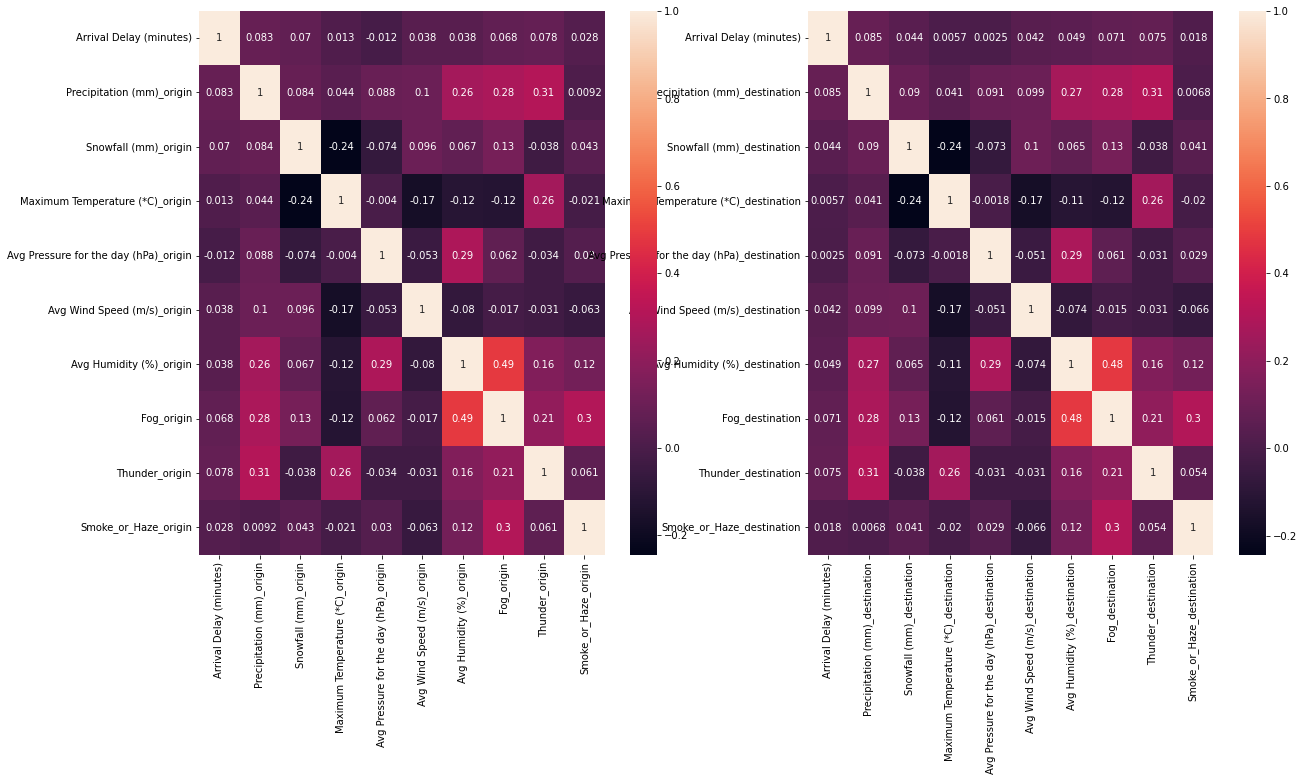

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(weather_features_dep.corr(), ax=ax1, annot=True)
sns.heatmap(weather_features_arr.corr(), ax=ax2, annot=True)
plt.show()

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

*** These graphs are from an older dataset, which we can't reproduce as we no longer have the data.

NameError: name 'MaxNLocator' is not defined

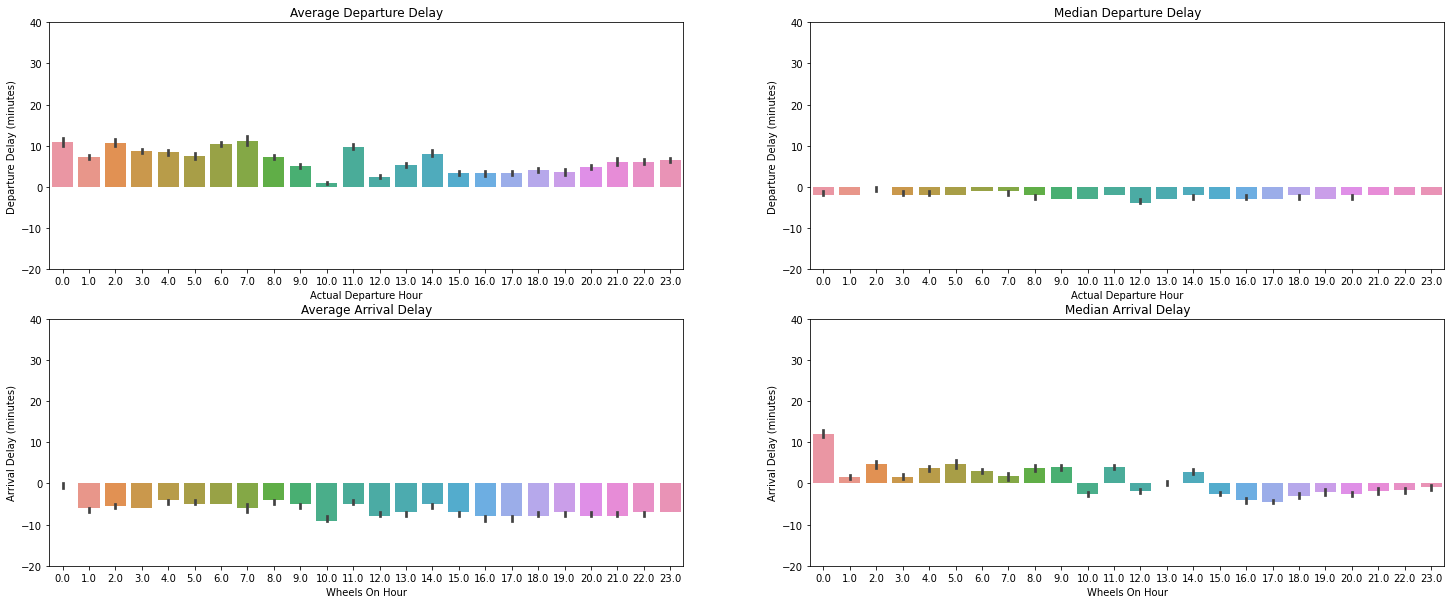

In [22]:
# Plot the average and median departure delay and departure for each hour of the day
fig, ax = plt.subplots(2, 2, figsize=(25, 10))
#fig.suptitle('Average (Left) & Median (Right) Hourly Delay for Departure and Arrival', fontsize=16, fontweight='bold')
sns.barplot(x='Actual Departure Hour', y='Departure Delay (minutes)', data=flights_analysis, ax=ax[0,0])
sns.barplot(x='Actual Departure Hour', y='Departure Delay (minutes)', data=flights_analysis, ax=ax[0,1], estimator=np.median)
sns.barplot(x='Wheels On Hour', y='Arrival Delay (minutes)', data=flights_analysis, ax=ax[1,1])
sns.barplot(x='Wheels On Hour', y='Arrival Delay (minutes)', data=flights_analysis, ax=ax[1,0], estimator=np.median)

#add title
ax[0,0].set_title('Average Departure Delay')
ax[0,1].set_title('Median Departure Delay')
ax[1,0].set_title('Average Arrival Delay')
ax[1,1].set_title('Median Arrival Delay')

#set y scale
ax[0,1].set(ylim=(-20, 40))
ax[0,0].set(ylim=(-20, 40))
ax[1,1].set(ylim=(-20, 40))
ax[1,0].set(ylim=(-20, 40))

#Simplify the X axis so it's more readable
ax[0,0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0,1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1,0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1,1].xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

What is the difference between average and median in that situation?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [48]:
# Create a new columns that calculates the difference between the departure delay and arrival delay
flights_sample['Difference in Delay (Dep - Arr [minutes])'] = flights_sample['Departure Delay (minutes)'] - flights_sample['Arrival Delay (minutes)']
## Added above


In [46]:
# Count the number that have an arrival delay above 0 and divide by the total number of flights *100 for percentage
print("Percentage of flights with departure delays:",flights_sample['Arrival Delay (minutes)'].gt(0).sum()/len(flights_sample)*100)
print("Percentage of flights with arrival delays:",flights_sample['Departure Delay (minutes)'].gt(0).sum()/len(flights_sample)*100)
print()
# Calculate the percentage of flights that have a departure delay bigger & smaller than their arrival delay, using 'Difference in Delay (Dep - Arr [minutes])'
print("Percentage of flights with a departure delay bigger than their arrival delay:",flights_sample['Difference in Delay (Dep - Arr [minutes])'].gt(0).sum()/len(flights_sample)*100)
print("Percentage of flights with a departure delay smaller than their arrival delay:",flights_sample['Difference in Delay (Dep - Arr [minutes])'].lt(0).sum()/len(flights_sample)*100)

Percentage of flights with departure delays: 32.57339311459307
Percentage of flights with arrival delays: 31.690404896571028

Percentage of flights with a departure delay bigger than their arrival delay: 71.6308348780346
Percentage of flights with a departure delay smaller than their arrival delay: 25.505262546407053


In [49]:
# What is the average percentage of delays that is already created by the departure delay?
flights_sample[['Departure Delay (minutes)', 'Arrival Delay (minutes)', 'Difference in Delay (Dep - Arr [minutes])']].describe()

,Departure Delay (minutes),Arrival Delay (minutes),Difference in Delay (Dep - Arr [minutes])
count,189342.000000,189350.000000,189336.00000
mean,4.654414,-0.671323,5.32484
std,25.737541,28.576230,12.79278
min,-57.000000,-80.000000,-273.00000
25%,-6.000000,-15.000000,-1.00000
50%,-3.000000,-7.000000,6.00000
75%,4.000000,5.000000,13.00000
max,1519.000000,1537.000000,75.00000


In [50]:
#of the flights that have arrival delays >0, what % have departure delays >0?
arr_delays = flights_sample[['Arrival Delay (minutes)','Departure Delay (minutes)']]
arr_delays = arr_delays[arr_delays['Arrival Delay (minutes)'] > 0]
arr_delays.shape

(61680, 2)

In [51]:
arr_delays['Departure Delay (minutes)'].gt(0).sum()/arr_delays.shape[0] * 100

68.14526588845655

70% of flights that arrived late left late. This suggests that there is a high correlation between these variables. 

#### **Task 6**: How many states cover 50% of US air traffic? 

Unfortunately the way the data has been cleaner we don't have the states anymore..

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

This hypothesis was made with an older

In [54]:
# Airplane speeds
#Create df with relevant columns to calculate airplane speeds
flight_speeds = flights_sample[['Distance (miles)','Air Time','Departure Delay (minutes)']]
flight_speeds = flight_speeds[flight_speeds['Air Time'] != 0]

KeyError: "['Air Time'] not in index"

In [31]:
#Create additional column with flight speeds
flight_speeds['flight_speed'] = flight_speeds['Distance (miles)'] / flight_speeds['Air Time']

#Create additional column where departure delay is 'Y' for a late departure (>0) and 'N' for an on-time or early departure.
flight_speeds['Late Departure'] = np.where(flight_speeds['Departure Delay (minutes)'] > 0, 'Y', 'N')

flight_speeds = flight_speeds[['flight_speed','Late Departure']]
flight_speeds.head()

,flight_speed,Late Departure
0,8.411111,Y
1,5.742857,N
2,7.205128,N
3,9.113208,Y
4,6.548387,Y


In [32]:
flight_speeds.groupby("Late Departure")["flight_speed"].mean()

Late Departure
N    6.593889
Y    6.776747
Name: flight_speed, dtype: float64

In [33]:
#Create separate arrarys with speeds for late departures, not late departures
not_late_flights = flight_speeds[flight_speeds['Late Departure'] == 'N']
late_flights = flight_speeds[flight_speeds['Late Departure'] == 'Y']

In [34]:
not_late_flights.describe()

,flight_speed
count,129391.000000
mean,6.593889
std,1.241252
min,1.396226
25%,5.823529
50%,6.709677
75%,7.453704
max,11.905263


In [35]:
late_flights.describe()

,flight_speed
count,63280.000000
mean,6.776747
std,1.231561
min,1.240741
25%,6.040541
50%,6.904762
75%,7.619847
max,12.500000


In [36]:
print(type(not_late_flights['flight_speed']), type(late_flights['flight_speed']))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [37]:
late_flights = late_flights['flight_speed']
not_late_flights = not_late_flights['flight_speed']

In [38]:
print(not_late_flights.shape)
print(late_flights.shape)

(129391,)
(63280,)


In [39]:
not_late_flights_sample = not_late_flights.sample(63280)
print(not_late_flights_sample.shape)
print(late_flights.shape)

(63280,)
(63280,)


In [40]:
# late_flights_sample = late_flights.sample(5)
# # not_late_flights_sample = not_late_flights.sample(5)

In [41]:
#use z-test
from statsmodels.stats.weightstats import ztest as ztest
ztest(late_flights, not_late_flights_sample)

(27.12637348208452, 4.8117638294628e-162)

In [42]:
#the p-value is less than 0.05, therefore we have sufficient evidence that planes do fly faster when they are late. 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [43]:
#Short haul flights: Less than 3 hrs
#Medium Haul flights: 3-6hrs
#long Haul flights: More than 6hrs

# Create a new column 'Flight Haul Type' that calculates the flight duration in hours and assigns 1[short],2[medium],3[long] to the new column depending on the flight duration
flights_sample['Flight Haul Type'] = flights_sample['Air Time'].apply(lambda x: 1 if x < 180 else (2 if x < 360 else 3))

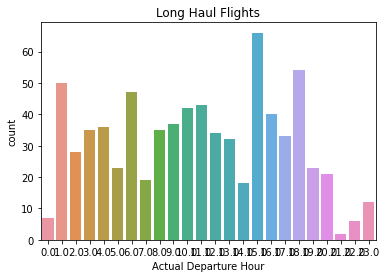

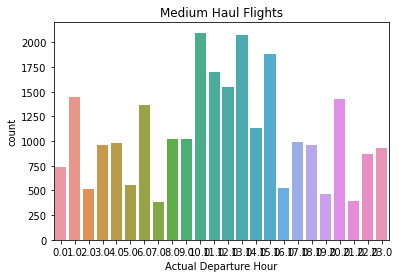

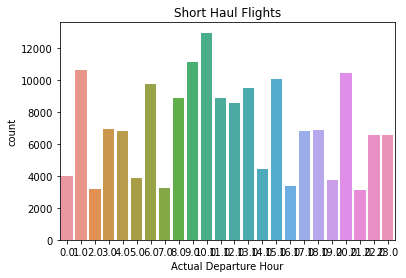

In [44]:
# visualize each type of haul flights by hour (Actual Departure Hour) in a bar plot
sns.countplot(x='Actual Departure Hour', data=flights_sample[flights_sample['Flight Haul Type'] == 3])
plt.title('Long Haul Flights')
plt.show()

sns.countplot(x='Actual Departure Hour', data=flights_sample[flights_sample['Flight Haul Type'] == 2])
plt.title('Medium Haul Flights')
plt.show()

sns.countplot(x='Actual Departure Hour', data=flights_sample[flights_sample['Flight Haul Type'] == 1])
plt.title('Short Haul Flights')
plt.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [45]:
departing_flights_passengers = pd.read_csv('../../data/raw/departing_flights_passengers.csv')
departing_flights_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20450 entries, 0 to 20449
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   origin                      20450 non-null  object
 1   total_departures            20450 non-null  int64 
 2   total_departing_passengers  20450 non-null  int64 
 3   year                        20450 non-null  int64 
 4   month                       20450 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 799.0+ KB


In [46]:
arriving_flights_passengers = pd.read_csv('../../data/raw/arriving_flights_passengers.csv')
arriving_flights_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20508 entries, 0 to 20507
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   dest                       20508 non-null  object
 1   total_arrivals             20508 non-null  int64 
 2   total_arriving_passengers  20508 non-null  int64 
 3   year                       20508 non-null  int64 
 4   month                      20508 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 801.2+ KB


In [47]:
from matplotlib.pyplot import figure

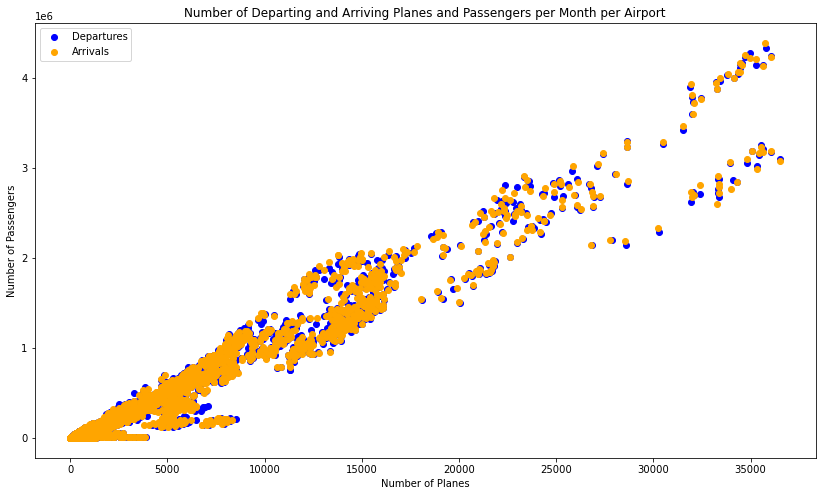

In [48]:
#plot the departing passengers on a scatter plot
fig, ax = plt.subplots()

ax.scatter(departing_flights_passengers['total_departures'], departing_flights_passengers['total_departing_passengers'], color="blue")
ax.scatter(arriving_flights_passengers['total_arrivals'], arriving_flights_passengers['total_arriving_passengers'], color="orange")

ax.set_xlabel("Number of Planes")
ax.set_ylabel("Number of Passengers")
ax.set_title("Number of Departing and Arriving Planes and Passengers per Month per Airport")

ax.legend(['Departures','Arrivals'])
fig.set_size_inches(14, 8)

plt.show()

In [49]:
# Group by airport to see total flights/year
departures_per_airport = departing_flights_passengers.groupby('origin')[['total_departures', 'total_departing_passengers']].sum()
departures_per_airport.head(2)

,total_departures,total_departing_passengers
origin,,
ABE,16942,818268
ABI,5399,169662


In [50]:
arrivals_per_airport = arriving_flights_passengers.groupby('dest')[['total_arrivals', 'total_arriving_passengers']].sum()
arrivals_per_airport.head(2)

,total_arrivals,total_arriving_passengers
dest,,
ABE,16439,811592
ABI,5725,165483


In [51]:
# 10 busiests airports by DEPARTING PLANES
departures_per_airport.sort_values('total_departures', ascending=False).head(30)

,total_departures,total_departing_passengers
origin,,
ATL,797710,93725009
ORD,795470,67406157
DFW,602474,60000472
DEN,568537,62545302
LAX,526502,60947137
CLT,499448,43235411
SEA,391492,43687404
PHX,375237,42434067
IAH,361839,32551633


In [52]:
# 10 busiests airports by DEPARTING PASSENGERS
departures_per_airport.sort_values('total_departing_passengers', ascending=False).head(10)

,total_departures,total_departing_passengers
origin,,
ATL,797710,93725009
ORD,795470,67406157
DEN,568537,62545302
LAX,526502,60947137
DFW,602474,60000472
LAS,340560,45247381
SEA,391492,43687404
CLT,499448,43235411
PHX,375237,42434067


In [53]:
# 10 busiests airports by ARRIVING PLANES
arrivals_per_airport.sort_values('total_arrivals', ascending=False).head(10)

,total_arrivals,total_arriving_passengers
dest,,
ATL,797740,93858938
ORD,795083,67464141
DFW,602053,60035874
DEN,569616,62567223
LAX,524327,60854173
CLT,498753,43349568
SEA,393936,43779746
PHX,373470,42455650
IAH,362640,32618785


In [54]:
# 10 busiests airports by ARRIVING PASSENGERS
arrivals_per_airport.sort_values('total_arriving_passengers', ascending=False).head(10)

,total_arrivals,total_arriving_passengers
dest,,
ATL,797740,93858938
ORD,795083,67464141
DEN,569616,62567223
LAX,524327,60854173
DFW,602053,60035874
LAS,340672,45234402
SEA,393936,43779746
CLT,498753,43349568
PHX,373470,42455650


In [55]:
flights_analysis.head()

,Flight Year,Flight Month,Flight Day,Flight Weekday,Marketer - Unique Carrier Code,Operator - Unique Carrier Code,Different Marketer & Operator Carrier Code,Tail Number,Flight Number,Origin Airport (ID),...,Carrier Delay (minutes),Weather Delay (minutes),National Air System Delay (minutes),Security Delay (minutes),Late Aircraft Delay (minutes),Actual Departure Hour,Wheels On Hour,Difference in Delay (Dep - Arr [minutes]),Departure State,Arrival State
0,2019,4,28,6,AA,AA,0,N914AN,2859,12889,...,0,0,0,0,0,16.0,1.0,10,NV,IL
1,2019,12,21,5,AA,AA,0,N764US,2934,15096,...,0,0,0,0,0,18.0,22.0,21,NY,NC
2,2018,10,22,0,WN,WN,0,N550WN,2320,11540,...,0,0,0,0,0,17.0,21.0,5,TX,TX
3,2018,11,17,5,WN,WN,0,N8319F,612,11292,...,0,0,20,0,8,17.0,2.0,-20,CO,SC
4,2018,12,6,3,DL,DL,0,N672DL,1797,10397,...,0,0,0,0,0,9.0,11.0,12,GA,FL


In [110]:
flights_per_day_per_airport = pd.pivot_table(flights_analysis, index = ["Flight Year", "Flight Month", "Flight Day", "Flight Weekday", "Origin Airport (IATA Code)"], values = ["Flight Number"], aggfunc='count')
flights_per_day_per_airport = flights_per_day_per_airport.reset_index()
flights_per_day_per_airport.sort_values('Flight Number', ascending=False)

,Flight Year,Flight Month,Flight Day,Flight Weekday,Origin Airport (IATA Code),Flight Number
66677,2019,12,13,4,ORD,26
51995,2019,7,15,0,ATL,26
16965,2018,7,5,3,ATL,25
20046,2018,8,6,0,ATL,25
39938,2019,3,11,0,ATL,24
...,...,...,...,...,...,...
30713,2018,11,29,3,ICT,1
30714,2018,11,29,3,IND,1
30715,2018,11,29,3,JAX,1
30719,2018,11,29,3,LAW,1


In [105]:
flights_per_day_per_airport.sort_values('Flight Number', ascending=False)

Flight Number
Flight Year Flight Month Flight Day Flight Weekday Origin Airport (IATA Code)               
2019        12           13         4              ORD                                    26
            7            15         0              ATL                                    26
2018        7            5          3              ATL                                    25
            8            6          0              ATL                                    25
2019        3            11         0              ATL                                    24
...                                                                                      ...
2018        11           29         3              ICT                                     1
                                                   IND                                     1
                                                   JAX                                     1
                                                   LAW                                     1
2019        12           31         1              YUM                                     1

[68398 rows x 1 columns]

In [81]:
busyness_month_weekday = pd.pivot_table(flights_analysis, index = "Origin Airport (IATA Code)", columns = ["Flight Month", "Flight Weekday"], values = "Flight Number", aggfunc='count')
busyness_month_weekday.head(30)

Flight Month                   1                                          \
Flight Weekday                  0      1      2      3     4     5     6   
Origin Airport (IATA Code)                                                 
ABE                           1.0    1.0    1.0    NaN   2.0   1.0   1.0   
ABI                           NaN    NaN    NaN    2.0   1.0   NaN   1.0   
ABQ                          10.0   14.0    8.0   12.0   3.0   5.0   6.0   
ABR                           NaN    NaN    NaN    NaN   NaN   1.0   NaN   
ABY                           NaN    NaN    NaN    NaN   NaN   NaN   NaN   
ACK                           NaN    NaN    NaN    NaN   NaN   NaN   NaN   
ACT                           3.0    NaN    2.0    NaN   1.0   NaN   NaN   
ACV                           1.0    NaN    NaN    NaN   1.0   NaN   NaN   
ACY                           2.0    2.0    1.0    NaN   NaN   1.0   3.0   
ADK                           NaN    NaN    NaN    NaN   NaN   NaN   NaN   
ADQ                           NaN    1.0    NaN    NaN   NaN   NaN   NaN   
AEX                           NaN    1.0    2.0    2.0   NaN   NaN   NaN   
AGS                           NaN    3.0    1.0    1.0   1.0   NaN   NaN   
ALB                           7.0    7.0    2.0    4.0   2.0   7.0   2.0   
ALO                           NaN    NaN    NaN    NaN   NaN   NaN   NaN   
ALW                           1.0    1.0    NaN    NaN   NaN   NaN   NaN   
AMA                           1.0    4.0    3.0    1.0   2.0   NaN   4.0   
ANC                           4.0   11.0    3.0    6.0   5.0   3.0   8.0   
APN                           NaN    NaN    NaN    NaN   NaN   NaN   NaN   
ART                           NaN    NaN    NaN    NaN   NaN   2.0   NaN   
ASE                           1.0    1.0    3.0    2.0   1.0   3.0   3.0   
ATL                         118.0  134.0  122.0  123.0  97.0  71.0  79.0   
ATW                           3.0    2.0    1.0    NaN   3.0   1.0   5.0   
ATY                           NaN    NaN    NaN    NaN   NaN   NaN   NaN   
AUS                          20.0   17.0   18.0   19.0  11.0   4.0  15.0   
AVL                           5.0    5.0    2.0    3.0   2.0   1.0   3.0   
AVP                           3.0    4.0    NaN    3.0   2.0   1.0   1.0   
AZA                           3.0    1.0    1.0    NaN   4.0   NaN   1.0   
AZO                           NaN    2.0    1.0    1.0   1.0   NaN   2.0   
BDL                           9.0    6.0    9.0   11.0   4.0   8.0   9.0   

Flight Month                   2                ...     11                \
Flight Weekday                  0     1      2  ...      4      5      6   
Origin Airport (IATA Code)                      ...                        
ABE                           1.0   1.0    1.0  ...    1.0    2.0    3.0   
ABI                           NaN   NaN    NaN  ...    NaN    1.0    NaN   
ABQ                           7.0   5.0    5.0  ...   13.0    2.0    3.0   
ABR                           NaN   NaN    NaN  ...    NaN    NaN    NaN   
ABY                           1.0   1.0    NaN  ...    NaN    NaN    1.0   
ACK                           NaN   NaN    NaN  ...    NaN    NaN    NaN   
ACT                           NaN   NaN    NaN  ...    NaN    1.0    1.0   
ACV                           1.0   NaN    NaN  ...    1.0    1.0    NaN   
ACY                           2.0   3.0    1.0  ...    NaN    NaN    1.0   
ADK                           NaN   NaN    NaN  ...    NaN    NaN    NaN   
ADQ                           NaN   NaN    NaN  ...    NaN    1.0    NaN   
AEX                           1.0   1.0    1.0  ...    1.0    1.0    2.0   
AGS                           3.0   1.0    1.0  ...    2.0    1.0    3.0   
ALB                           7.0   4.0    2.0  ...    6.0    3.0    5.0   
ALO                           1.0   NaN    NaN  ...    NaN    NaN    NaN   
ALW                           NaN   NaN    NaN  ...    NaN    NaN    NaN   
AMA                           1.0   2.0    2.0 

In [82]:
busyness_month_weekday.sort_values(( 1, 0), ascending=False)

Flight Month                   1                                          \
Flight Weekday                  0      1      2      3     4     5     6   
Origin Airport (IATA Code)                                                 
ATL                         118.0  134.0  122.0  123.0  97.0  71.0  79.0   
ORD                         102.0  103.0  113.0   93.0  97.0  78.0  89.0   
CLT                          79.0   76.0   74.0   68.0  61.0  54.0  75.0   
DFW                          76.0   83.0   90.0   81.0  85.0  62.0  64.0   
IAH                          73.0   54.0   60.0   52.0  39.0  47.0  44.0   
...                           ...    ...    ...    ...   ...   ...   ...   
WYS                           NaN    NaN    NaN    NaN   NaN   NaN   NaN   
XWA                           NaN    NaN    NaN    NaN   NaN   NaN   NaN   
YAK                           NaN    NaN    NaN    NaN   NaN   NaN   NaN   
YNG                           NaN    NaN    NaN    1.0   NaN   NaN   NaN   
YUM                           NaN    NaN    NaN    NaN   1.0   NaN   1.0   

Flight Month                   2                 ...     11                \
Flight Weekday                  0      1      2  ...      4      5      6   
Origin Airport (IATA Code)                       ...                        
ATL                         124.0   83.0  111.0  ...  149.0  115.0  104.0   
ORD                          92.0  117.0   92.0  ...  141.0  103.0  105.0   
CLT                          62.0   52.0   51.0  ...   83.0   70.0   76.0   
DFW                          75.0   59.0   61.0  ...   82.0   71.0   86.0   
IAH                          43.0   34.0   45.0  ...   57.0   40.0   59.0   
...                           ...    ...    ...  ...    ...    ...    ...   
WYS                           NaN    NaN    NaN  ...    NaN    NaN    NaN   
XWA                           NaN    NaN    NaN  ...    1.0    1.0    NaN   
YAK                           NaN    NaN    2.0  ...    NaN    NaN    NaN   
YNG                           NaN    NaN    NaN  ...    NaN    NaN    NaN   
YUM                           NaN    1.0    NaN  ...    NaN    NaN    1.0   

Flight Month                   12                                            
Flight Weekday                  0      1      2      3      4      5      6  
Origin Airport (IATA Code)                                                   
ATL                         107.0  106.0  103.0  143.0  113.0  111.0  141.0  
ORD                         131.0  109.0   98.0  110.0  123.0  111.0  156.0  
CLT                          81.0   63.0   61.0   71.0   78.0   65.0   84.0  
DFW                          98.0   77.0   79.0   76.0   80.0   85.0  109.0  
IAH                          56.0   55.0   40.0   45.0   64.0   50.0   64.0  
...                           ...    ...    ...    ...    ...    ...    ...  
WYS                           NaN    NaN    NaN    NaN    NaN    NaN    NaN  
XWA                           1.0    1.0    NaN    NaN    1.0    NaN    NaN  
YAK                           1.0    NaN    NaN    NaN    NaN    NaN    NaN  
YNG                           NaN    NaN    NaN    NaN    NaN    NaN    NaN  
YUM                           1.0    1.0    1.0    2.0    NaN    3.0    NaN  

[374 rows x 84 columns]

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [ ]:
flights_analysis['Operator - Unique Carrier Code'].describe()


In [ ]:
flights_analysis.head(3)

In [ ]:
delays_by_month_carrier = pd.pivot_table(flights_analysis,index = ["Operator - Unique Carrier Code",'Flight Year','Flight Month'], values = ['Arrival Delay (minutes)'], aggfunc=np.sum)
delays_by_month_carrier.reset_index()

Operator - Unique Carrier Code Flight Year  \
Arrival Delay (minutes)                                              
0                                                   9E        2018   
1                                                   9E        2018   
2                                                   9E        2018   
3                                                   9E        2018   
4                                                   9E        2018   
..                                                 ...         ...   
620                                                 ZW        2019   
621                                                 ZW        2019   
622                                                 ZW        2019   
623                                                 ZW        2019   
624                                                 ZW        2019   

                        Flight Month Actual Departure Hour                  \
Arrival Delay (minutes)                                -80 -74 -73 -72 -71   
0                                  1                   NaN NaN NaN NaN NaN   
1                                  2                   NaN NaN NaN NaN NaN   
2                                  3                   NaN NaN NaN NaN NaN   
3                                  4                   NaN NaN NaN NaN NaN   
4                                  5                   NaN NaN NaN NaN NaN   
..                               ...                   ...  ..  ..  ..  ..   
620                                8                   NaN NaN NaN NaN NaN   
621                                9                   NaN NaN NaN NaN NaN   
622                               10                   NaN NaN NaN NaN NaN   
623                               11                   NaN NaN NaN NaN NaN   
624                               12                   NaN NaN NaN NaN NaN   

                                 ... Wheels On Hour                         \
Arrival Delay (minutes) -68 -67  ...            143  144 145   146 147 148   
0                       NaN NaN  ...            NaN  0.0 NaN   NaN NaN NaN   
1                       NaN NaN  ...            NaN  NaN NaN   NaN NaN NaN   
2                       NaN NaN  ...            NaN  NaN NaN   NaN NaN NaN   
3                       NaN NaN  ...            NaN  NaN NaN   NaN NaN NaN   
4                       NaN NaN  ...            NaN  NaN NaN   NaN NaN NaN   
..                       ..  ..  ...            ...  ...  ..   ...  ..  ..   
620                     NaN NaN  ...            NaN  NaN NaN   NaN NaN NaN   
621                     NaN NaN  ...            NaN  NaN NaN   NaN NaN NaN   
622                     NaN NaN  ...            NaN  NaN NaN   NaN NaN NaN   
623                     NaN NaN  ...            NaN  NaN NaN   NaN NaN NaN   
624                     NaN NaN  ...            NaN  NaN NaN  14.0 NaN NaN   

                                          
Arrival Delay (minutes) 149  150 151 152  
0                       NaN  NaN NaN NaN  
1                       NaN  NaN NaN NaN  
2                       NaN  NaN NaN NaN  
3                       NaN  NaN NaN NaN  
4                       NaN  NaN NaN NaN  
..                       ..  ...  ..  ..  
620                     NaN  NaN NaN NaN  
621                     NaN  NaN NaN NaN  
622                     NaN  NaN NaN NaN  
623                     NaN  NaN NaN NaN  
624                     NaN  2.0 NaN NaN  

[625 rows x 4707 columns]

In [ ]:
carriers_passengers_and_distance = pd.read_csv('../../data/raw/carriers_passengers_and_distance.csv')
carriers_passengers_and_distance.columns = ['total_distance', 'total_passengers', "Operator - Unique Carrier Code",'Flight Year','Flight Month']
carriers_passengers_and_distance.head()

In [ ]:
total_fuel_passengers_by_carrier = pd.read_csv('../../data/raw/total_fuel_passengers_by_carrier.csv')
total_fuel_passengers_by_carrier.columns = ['total_gallons_fuel_domestic', "Operator - Unique Carrier Code",'Flight Year','Flight Month']
total_fuel_passengers_by_carrier['total_gallons_fuel_domestic'].value_counts()

In [ ]:
#Remove all zeroes from table above
total_fuel_passengers_by_carrier = total_fuel_passengers_by_carrier[total_fuel_passengers_by_carrier['total_gallons_fuel_domestic'] != 0]
total_fuel_passengers_by_carrier.describe()

In [ ]:
#Join tables - 1
fuel_consumption_analysis = pd.merge(delays_by_month_carrier, carriers_passengers_and_distance, 
                                    on = ['Operator - Unique Carrier Code', 'Flight Year', 'Flight Month'], how = 'outer')
fuel_consumption_analysis.describe()

In [ ]:
#Join tables - 2
fuel_consumption_analysis = pd.merge(fuel_consumption_analysis, total_fuel_passengers_by_carrier, 
                                    on = ['Operator - Unique Carrier Code', 'Flight Year', 'Flight Month'], how = 'outer')
fuel_consumption_analysis.head(50)

In [ ]:
fuel_consumption_analysis.info()

In [ ]:
fuel_consumption_analysis['fuel_consumption_per_passenger_mile'] = fuel_consumption_analysis['total_gallons_fuel_domestic'] / fuel_consumption_analysis['total_passengers'] / fuel_consumption_analysis['total_distance']
fuel_consumption_analysis.head()

In [ ]:
fuel_consumption_analysis.head(50)

In [ ]:
# fuel_consumption_analysis = fuel_consumption_analysis[fuel_consumption_analysis['Arrival Delay (minutes)'] > 0]

In [ ]:
#plot the total arrival delay vs fuel_consumption_per_passenger_mile on scatter plot
fig, ax = plt.subplots()

ax.scatter(fuel_consumption_analysis['fuel_consumption_per_passenger_mile'], fuel_consumption_analysis['Arrival Delay (minutes)'], color="red")

ax.set_xlabel("Gallons Fuel Consumption Per Passenger Mile")
ax.set_ylabel("Total Monthly Arrival Delay (Minutes)")
ax.set_title("Total Arrival Delay vs Fuel Consumption per Passenger-Mile")

fig.set_size_inches(14, 8)

plt.show()